## <span style="color:brown;"><center> Restaurant Data Analysis with Python Libraries </center></span>

In [1]:
#  Importing essential libraries for data analysis and visualization
import numpy as np         # Numerical operations and array manipulation
import pandas as pd        # Data manipulation and analysis, particularly for structured data
import matplotlib.pyplot as plt      # Data visualization library for crating static, interactive, animated plots
import seaborn as  sns        # Statistical data visualization based on matplotlib, providing high-level interfaces

In [2]:
# Load the restaurant dataset from a CSV file into a Dataframe
restaurant=pd.read_csv('restaurant.csv')        # Reading the restaurant data from the specified CSV file into a pandas dataframe 

### Step 1 : Understand the Data

In [3]:
# Display the contents of the dataframe in Jupyter Notebook for inspection
restaurant       # Display the entire dataframe to analyze and visualize

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# Display the first few rows of the dataframe to get an overview of the data
restaurant.head()        # Show the first 5 rows of the dataframe for a quick preview

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Display the last few rows of the dataframe to examine the end of the dataset
restaurant.tail()     # Show the last 5 rows of the dataframe for a quick look at the dataset's conclusion

,total_bill,tip,gender,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Display a concise summary of the dataframe, including data dypes and non-null counts
restaurant.info()       # Provides a quick overview of the dataframe structure, including column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
# Retrieve the dimensions of the dataframe
restaurant.shape       # Returns a tuple representing the number of rows and columns in the dataframe

(244, 7)

In [8]:
# Retrieve the columns names of the dataframe to understand its structure
restaurant.columns        # Returns a list of column names in the dataframe, providing an overview of the dataset's features

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
# Get the count of unique values for each column in the dataframe
restaurant.nunique()       # Returns the number of unique values per column, helping to identify the diversity of data in each feature

total_bill    229
tip           123
gender          2
smoker          2
day             4
time            2
size            6
dtype: int64

In [10]:
# Retrieve the unique values in the 'gender' column to understand the distinct categories
restaurant['gender'].unique()         # Returns an array of unique values in the 'gender' column, helping to identify the categories present in the data

array(['Female', 'Male'], dtype=object)

### Step 2 : Data Cleaning

In [11]:
# Check for missing (null) values in each column of the dataframe
restaurant.isnull().sum()       # Returns the total count of missing values per column, helping to identify data gaps and handle missing data

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Since no missing or null values were found, duplicate rows in the dataframe will now be checked.

In [12]:
# Identify and display the duplicate rows in the dataframe
restaurant[restaurant.duplicated()]         # Returns a dataframe containing all the rows that are duplicates of previous rows

,total_bill,tip,gender,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


#### A duplicate row has been identified and will now be removed to ensure a more accurate analysis

In [13]:
# Remove duplicate rows from dataframe to ensure data accuracy
restaurant.drop_duplicates(inplace=True)         # Removes all duplicate rows from the dataframe, modifying it in place to maintain unique data

In [14]:
# Check the new dimensions of the dataframe after removing duplicate rows
restaurant.shape       # Returns the updated number of rows and columns in the dataframe, reflecting the removal of duplicate entries

(243, 7)

#### So, the data has now been cleaned, Step 3 : Analysis can now be proceeded with.

## Step 3 : Analyze the Data and Extract Meaningful Insights

In [15]:
# Display the first few rows of the dataframe to begin the analysis and understand the data structure
restaurant.head()       # Shows the first 5 rows of the dataframe, providing an initial overview of the data for analysis

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# 1. Calculate the total sum of the 'total_bill' column to assess the overall bill amount
restaurant['total_bill'].sum()        # Returns the sum of all values in the 'total_bill', providing the total bill amount

4814.77

In [17]:
# 2. Calculate the total sum of the 'tip' column and round the result to two decimal places for precision
restaurant['tip'].sum().round(2)           # Returns the sum of all values in the 'tip' column, rounded to two decimal places

729.58

In [18]:
# 3. Find the maximum value in the 'total_bill' column to identify the highest bill amount
restaurant['total_bill'].max()          # Returns the maximum value from the 'total_bill' column, representing the highest bill amount

50.81

In [19]:
# 4. Find the minimum value in the 'total_bill' column to identify the lowest bill amount
restaurant['total_bill'].min()            # Returns the minimum value from the 'total_bill' column, representing the lowest bill amount

3.07

In [20]:
# 5. Find the maximum value in the 'tip' column to identify the highest tip amount
restaurant['tip'].max()         # Returns the maximum value from the 'tip' column, representing the highest tip amount

10.0

In [21]:
# 6. Find the minimum value in the 'tip' column to identify the lowest tip amount
restaurant['tip'].min()          # Returns the minimum value from the 'tip' column, representing the lowest tip amount

1.0

In [22]:
# 7. find the correlation between the values in the 'total_bill' and 'tip' columns to examine their relationship
restaurant[['total_bill','tip']].corr()  # Returns the correlation coefficient between the 'total_bill' and 'tip' columns, indicating the strength and direction of their relationship

,total_bill,tip
total_bill,1.000000,0.674998
tip,0.674998,1.000000


In [23]:
# 8. Group the data by the 'gender' and calculate the total bill amount for each group
restaurant.groupby(by='gender').total_bill.sum()     # Returns the total sum of 'total_bill' column for each category in the 'gender' column, representing the overall bill amount for each group

gender
Female    1557.95
Male      3256.82
Name: total_bill, dtype: float64

In [24]:
# 9. Goup the data by the 'gender' column and calculate the total tip amount for each group
restaurant.groupby(by='gender').tip.sum()      # Returns the total sum of 'tip' column for each category in the 'gender' column, representing the overall tip amount for each group

gender
Female    244.51
Male      485.07
Name: tip, dtype: float64

In [25]:
# Create a pivot table to calculate the total sum of 'total_bill' and 'tip' column grouped by 'gender' column
restaurant.pivot_table(index='gender',values=['total_bill','tip'],aggfunc='sum')     # Returns a pivot table with the total sum of 'total_bill' and 'tip' column for each category in the 'gender' column

,tip,total_bill
gender,,
Female,244.51,1557.95
Male,485.07,3256.82


In [26]:
# 10. Group the data by the 'day' column and calculate the total bill amount for each day
restaurant.groupby(by='day').total_bill.sum()      # Returns the total sum of 'total_bill' column for each day in the 'day' column, representing the overall bill amount for each day

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1083.33
Name: total_bill, dtype: float64

In [27]:
# 11. Group the data by the 'day' column and calculate the total tip amount for each day
restaurant.groupby(by='day').tip.sum()  # Returns the total sum of 'tip' column for each day in the 'day' column, representing the overall tip amount for each day

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    169.83
Name: tip, dtype: float64

In [28]:
# Create a pivot table to calculate the total sum of 'total_bill' and 'tip' column grouped by 'day' column
restaurant.pivot_table(index='day',values=['total_bill','tip'],aggfunc='sum')     # Returns a pivot table with the total sum of 'total_bill' and 'tip' column for each day in the 'day' column

,tip,total_bill
day,,
Fri,51.96,325.88
Sat,260.40,1778.40
Sun,247.39,1627.16
Thur,169.83,1083.33


In [29]:
# 12. Group the data by the 'time' column and calculate the total bill amount for each time period
restaurant.groupby(by='time').total_bill.sum()      # Returns the total sum of 'total_bill' column for each time period in the 'time' column, representing the overall bill amount for each time period

time
Dinner    3660.30
Lunch     1154.47
Name: total_bill, dtype: float64

In [30]:
# 13. Group the data by the 'time' column and calculate the total tip amount for each time period
restaurant.groupby(by='time').tip.sum()  # Returns the total sum of 'tip' column for each time period in the 'time' column, representing the overall tip amount for each time period

time
Dinner    546.07
Lunch     183.51
Name: tip, dtype: float64

In [31]:
# Create a pivot table to calculate the total sum of 'total_bill' and 'tip' column grouped by 'time' column
restaurant.pivot_table(index='time',values=['total_bill','tip'],aggfunc='sum')      # Returns a pivot table with the total sum of 'total_bill' and 'tip' column for each time period in the 'time' column

,tip,total_bill
time,,
Dinner,546.07,3660.30
Lunch,183.51,1154.47


In [32]:
# 14. Generate descriptive statistics for all numerical columns in the dataframe
restaurant.describe()     # Returns a summary of statistics, including count, mean, standard deviation, min, max, and quartiles for each numerical column in the dataframe

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


#### The 'size' column is categorical; however, due to its numerical values, statistics for this column are also displayed by pandas. 


In [33]:
# Retrieve the unique values in the 'size' column to identify all distinct categories or values in this column
restaurant['size'].unique()        # Returns an array of unique values present in the 'size' column

array([2, 3, 4, 1, 6, 5], dtype=int64)

#### The data type of 'size' column needs to be converted from int64 to object.

In [34]:
# 15. Convert the data type of 'size' column from its current type to 'object' to treat it as a categorical variable
restaurant=restaurant.astype({'size':object})      # Changes the data type of 'size' column to 'object', ensuring it is treated as a categorical variable

# Display the data types of all columns in the dataframe to verify the changes
restaurant.dtypes        # Returns the data types of all columns in the dataframe, allowing verification of the 'size' column type change

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size           object
dtype: object

In [35]:
# 16. Generate descriptive statistics for all numerical columns in the dataframe after changing the data type of 'size' column
restaurant.describe()       # Returns a summary of statistics, including count, mean, standard deviation, min, max, and quartiles for all numerical columns in the dataframe, excluding 'size' column which is now treated as a categorical variable

,total_bill,tip
count,243.000000,243.000000
mean,19.813868,3.002387
std,8.910071,1.385002
min,3.070000,1.000000
25%,13.380000,2.000000
50%,17.810000,2.920000
75%,24.175000,3.575000
max,50.810000,10.000000


In [36]:
# 17. Filter the dataframe for rows where the 'gender' is 'Male' and 'total_bill' is greater than 25, then count the number of such rows
restaurant[(restaurant.gender=='Male') & (restaurant.total_bill>25)].value_counts().sum()    # Returns the total count of rows where 'gender' is 'Male' and 'total_bill' exceeds 25, showing the number of qualifying entries

39

In [37]:
# 18. Filter the dataframe for rows where the 'gender' is 'Female', 'time' is 'Dinner', and 'day' is 'Sat', then count the number of such rows
restaurant[(restaurant.gender=='Female') & (restaurant.time=='Dinner') & (restaurant.day=='Sat')].value_counts().sum()
# Returns the total count of rows where 'gender' is 'Female', 'time' is 'Dinner', and 'day' is 'Sat', showing the number of qualifying entries

28

#### Visualizations are now used to facilitate the discovery of insights.

In [38]:
# Display the first few rows of the dataframe to get an overview of the data before visualizing
restaurant.head()      # Returns the first five rows of the dataframe, providing a snapshot of the data for initial inspection prior to visualization

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


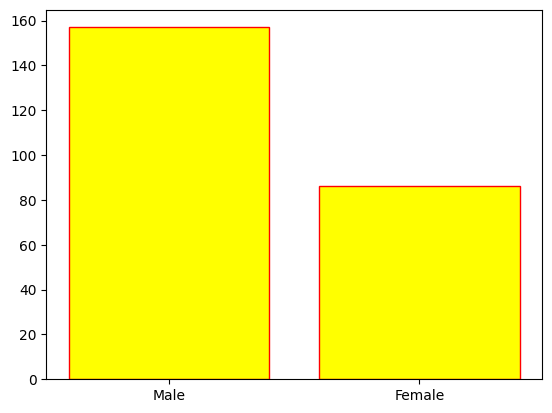

In [39]:
# 1. Create a bar chart to visualize the distribution of 'gender' values, with custom colors for the bars and edges
plt.bar(x=restaurant.gender.value_counts().index,height=restaurant.gender.value_counts().values,edgecolor='red',color='yellow')    # Plots a bar chart showing the count of each unique value in the 'gender' column with yellow bars and red edges
plt.show()     # Displays the bar chart for visual analysis

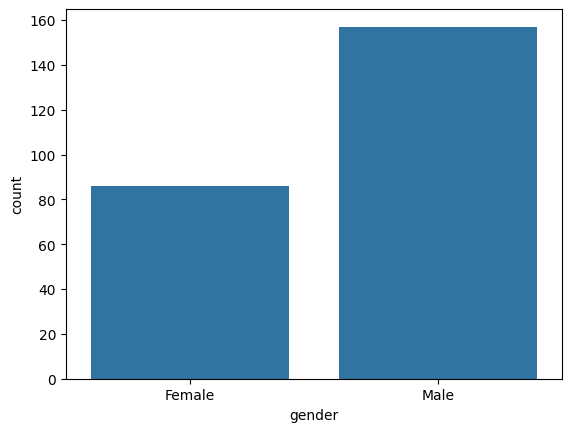

In [40]:
# Create a count plot to visualize the distribution of values in the 'gender' column
sns.countplot(x=restaurant.gender)      # Plots a count plot showing the frequency of each unique value in the 'gender' column
plt.show()       # Displays the count plot for visual analysis

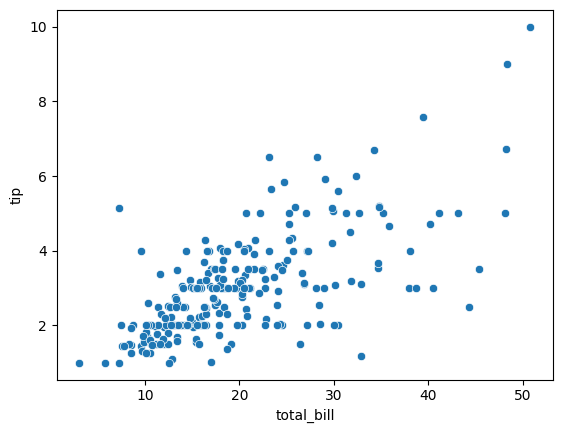

In [41]:
# 2. Create a scatter plot to visualize the relationship between 'total_bill' and 'tip' columns
sns.scatterplot(x=restaurant.total_bill,y=restaurant.tip)    # Plots a scatter plot to show the correlation between the 'total_bill' and 'tip' values
plt.show()      # Displays the scatter plot for visual analysis

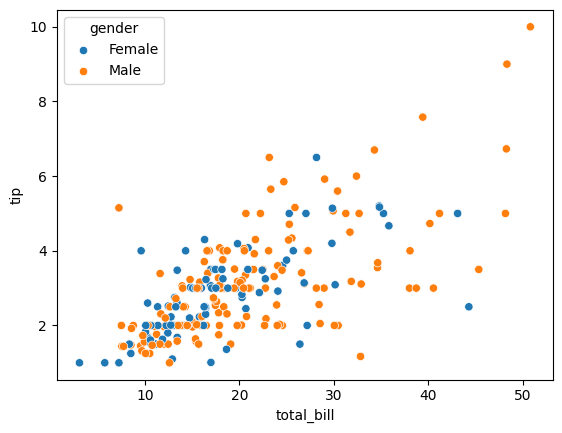

In [42]:
 # 3. Create a scatter plot to visualize the relationship between 'total_bill' and 'tip', with data points colored by 'gender'
sns.scatterplot(x=restaurant.total_bill,y=restaurant.tip,hue=restaurant.gender)     # Plots a scatter plot showing the correlation between 'total_bill' and 'tip', with points colored by the 'gender' column
plt.show()     # Displays the scatter plot for visual analysis

In [43]:
# Filter the dataframe to find customers who paid a bill of less than 10 but gave a tip greater than 5
restaurant[(restaurant.total_bill<10) & (restaurant.tip>5)]      # Returns rows where the 'total_bill' is less than 10 and the 'tip' is greater than 5, identifying customers with a high tip relative to their bill

,total_bill,tip,gender,smoker,day,time,size
172,7.25,5.15,Male,Yes,Sun,Dinner,2


<Axes: xlabel='total_bill'>

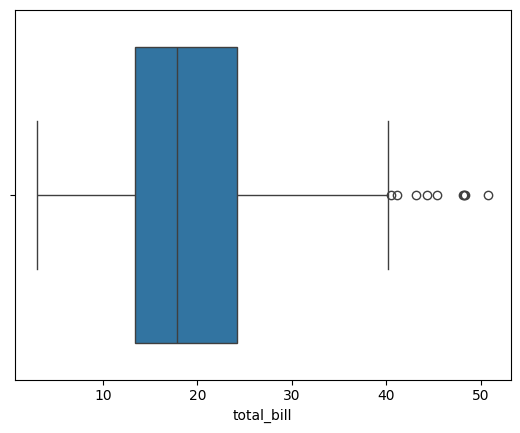

In [44]:
# 4. Create a box plot to visualize the distribution and detect outliers in the 'total_bill' column
sns.boxplot(x=restaurant.total_bill)    # Plots a box plot to show the distribution, median, and potential outliers in the 'total_bill' column

In [45]:
# Filter the dataframe to find customers who paid more than 40 for their bill and count the number of such entries
restaurant[restaurant.total_bill>40].value_counts().sum()    # Returns the total count of rows where the 'total_bill' exceeds 40, identifying the number of customers with a bill greater than 40

10

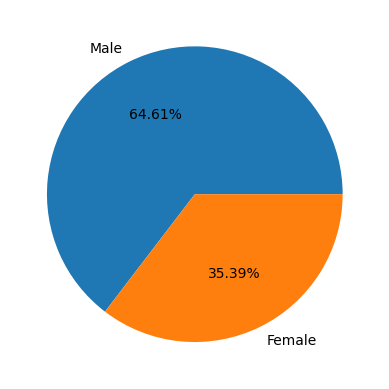

In [46]:
# 5. Create a pie chart to visualize the distribution of 'gender' values as percentages
plt.pie(x=restaurant.gender.value_counts().values,labels=restaurant.gender.value_counts().index,autopct='%.2f%%')    # Plots a pie chart showing the percentage distribution of each 'gender' category, with labels and percentage values displayed
plt.show()     # Displays the pie chart for visual analysis

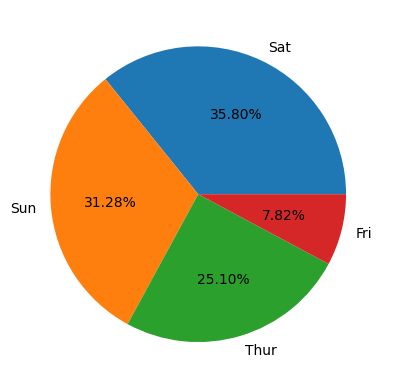

In [47]:
# 6. Create a pie chart to visualize the distribution of 'day' values as percentages
plt.pie(x=restaurant.day.value_counts().values,labels=restaurant.day.value_counts().index,autopct='%.2f%%')     # Plots a pie chart showing the percentage distribution of each 'day' category, with labels and percentage values displayed
plt.show()     # Displays the pie chart for visual analysis

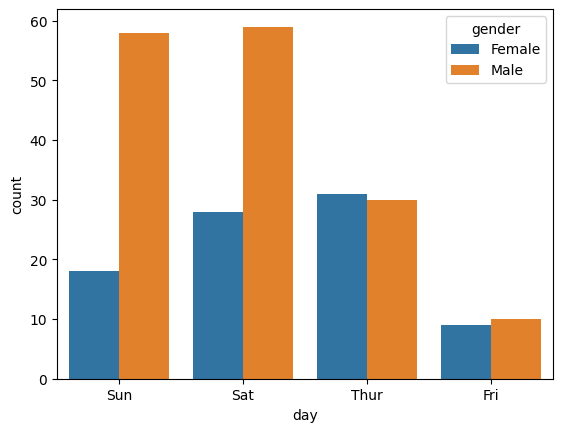

In [48]:
# 7. Create a count plot to visualize the distribution of 'day' values, grouped by 'gender'
sns.countplot(x=restaurant.day,hue=restaurant.gender)    # Plots a count plot showing the frequency of each 'day' category, with different colors representing the 'gender' groups
plt.show()       # Displays the count plot for visual analysis

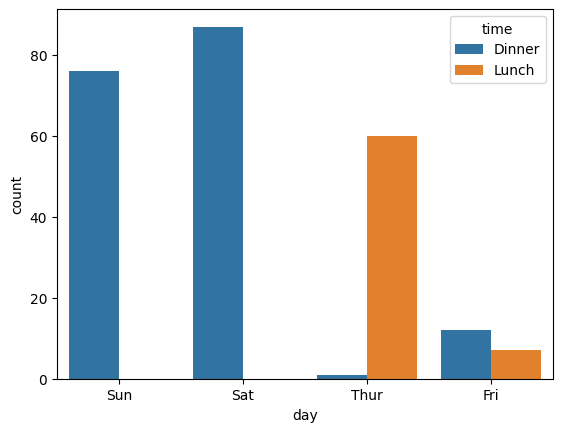

In [49]:
# 8. Create a count plot to visualize the distribution of 'day' values, grouped by 'time'
sns.countplot(x=restaurant.day,hue=restaurant.time)       # Plots a count plot showing the frequency of each 'day' category, with different colors representing the 'time' (e.g., lunch or dinner) groups
plt.show()       # Displays the count plot for visual analysis

## Final Conclusion of the Analysis:
1. Customers do not typically visit for lunch on Saturdays and Sundays, and very few dine for dinner on Thursdays.
2. The majority of customers are male, with a male-to-female ratio of approximately 2:1.
3. A positive correlation exists between the total bill and tip. However, there are instances where customers with a higher bill may leave a lower tip, and vice versa.